# Data4Policy 

## Background 

UNDP has partnered with the Government of Telangana to jointly initiate the NextGenGov ‘Data for Policy’ initiative on Food Systems. The aim is to incorporate anticipatory governance models for future-fit food systems in Telangana using data-driven policymaking tools and ecosystem-driven approaches. UNDP is keen on augmenting learning capabilities, increasing the predictive or anticipatory capacity to feed-in to evidence-driven policies in the state, and create radical traceability and transparency across the system from producers to consumers by building provenance documentation around food that can help build trust in the system at the same time nurture sustainable and healthy practices. The goal is to design, develop and demonstrate anticipatory governance models for food systems in Telangana using digital public goods and community-centric approaches to strengthen data-driven policy making in the state. 

## About DiCRA (Data in Climate Resilient Agriculture) Platform
The DiCRA platform for Telangana is envisioned as a Digital Public Good that will strategically feed into data-driven decision making in the state. The platform will have the capability to visualize and analyze high resolution geospatial data (both vector as well as raster layers). The digital platform will curate, integrate and visualise such critical datasets and assets to answer the basic question of - What is growing where? How much is there and the spatial and temporal changes within the state across various indicators relevant to Agriculture and Food Systems. The platform should be able to visualize over time the changes that have happened to the agriculture ecosystem in terms of crop diversity, changes in soil/ground water, tree cover, and other indicators at higher resolution to support policy decisions. Such a synthesis of data and analytics can help identify farms which are doing exceptionally well (Positive Deviance) through which repositories of good practices and indigenous knowledge can be documented. This also helps in identifying farms that are not doing good as per the defined indicators (Negative Deviance). 

<img width="485" alt="image" src="https://user-images.githubusercontent.com/42402451/138163824-a7be022f-bd48-415c-b282-fb985aee847e.png">

Positive and negative deviance would be particularly interesting to policy makers since they provide valuable intelligence on – which farms are having exceptionally high productivity compared to others? Which farms are most resilient (or most vulnerable) to extreme weather incidents? Such intelligence when combined with farmer-centric ethnographic research on the ground will provide insights and patterns on climate resilient agriculture practices that are already working well on the ground. The combination of data-driven and community-centric approaches when translated into policy insights can generate policy effects for strengthening climate resilient agriculture.    

## Data Flow

Data collaboration and synchronization is vital for implementing this technology solution. This platform aims to incorporate data from Open data platforms, Non-Public Domain datasets through data partnerships and incorporate data from open APIs. 

Following is a depiction of the dataflow proposed under the project -

<img width="347" alt="image" src="https://user-images.githubusercontent.com/42402451/138163914-85322590-f0ea-44f4-88e6-4452f49d7057.png">






In [211]:
# import libraries


In [213]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
# import seaborn as sns # visualization
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio import mask

import shapely
from shapely.geometry import Polygon, Point
from shapely.ops import cascaded_union
import shapely.speedups

shapely.speedups.enable()

import warnings
warnings.filterwarnings('ignore')


- ### UNDP Geospatial Data Science Internship Assessment
Background
UNDP has partnered with the Government of Telangana to jointly initiate the NextGenGov ‘Data for Policy’ initiative on Food Systems. The aim is to incorporate anticipatory governance models for future-fit food systems in Telangana using data-driven policymaking tools and ecosystem-driven approaches. UNDP is keen on augmenting learning capabilities, increasing the predictive or anticipatory capacity to feed into evidence-driven policies in the state, and create r radical traceability and transparency across the system from producers to consumers by building provenance documentation around food that can help build trust in the system at the same time nurture sustainable and healthy practices. The goal is to design, develop and demonstrate anticipatory governance models for food systems in Telangana using digital public goods and community-centric approaches to strengthen data-driven policymaking in the state. The DiCRA platform is envisioned as a Digital Public Good that will strategically feed into data-driven decision-making in the state. The platform will have the capability to visualize and analyze high-resolution geospatial data (both vector as well as raster layers). The digital platform will curate, integrate and visualize such critical datasets and assets to answer the basic question of - What is growing where? How much is there and the spatial and temporal changes within the state across various indicators relevant to Agriculture and Food Systems? The platform should be able to visualize over time the changes that have happened to the agriculture ecosystem in terms of crop diversity, changes in soil/groundwater, tree cover, and other indicators at a higher resolution to support policy decisions. Such a synthesis of data and analytics can help identify farms that are doing exceptionally well (Positive Deviance) through which repositories of good practices and indigenous knowledge can be documented. This also helps in identifying farms that are not doing good as per the defined indicators (Negative Deviance).

Crop Residue Burning in India
An Indian Agricultural Research Institute study estimates that in 2008-09, the particulate released by crop residue burning is more than 17 times the total annual particulate pollution in Delhi from all sources—vehicles, industries, garbage burning, etc. Similarly, the total national annual emission for CO2 from crop residue burning is more than 64 times the total annual CO2 pollution emission in Delhi. India is the second-largest producer of rice worldwide. Paddy and wheat cropping are a widespread farming practice in northwestern parts of India; however, the burning of paddy and wheat straw and stubble by farmers after the harvesting season is quite common.

Currently DiCRA Platform is focusing on Telangana, and hence for the assessment you will be provided with datasets pertaining to Telangana.

DATA
(1) NASA Fire Information for Resource Management Systems

Data Information
MODIS standard quality Thermal Anomalies / Fire locations processed by the University of Maryland with a 3-month lag and distributed by FIRMS. These standard data (MCD14ML) replace the NRT (MCD14DL) files when available. Data is available from 01-01-2015 until 31-08-2021 (downloaded on Jan 28, 2022)

For more details please visit - NASA FIRMS MODIS or VIIRS Fire/Hotspot Data Download

Data Citation and Disclaimer
NASA promotes the full and open sharing of all data with the research and applications communities, private industry, academia, and the general public. Read the NASA Data and Information Policy.

Citation See: https://earthdata.nasa.gov/earth-observation-data/near-real-time/citation#ed-firms-citation
(2) ESRI have made available a ten class global land use/land cover (LULC) map for the year 2020 at 10 meter resolution available at this link.





- ### TASKS
We have created a subset of the Fires Dataset and extracted it only for Telangana using the shapefile downloaded from GADM. Please see the visualization of the dataset here. The data is provided to you as a CSV file (telangana_fires.csv) in the Datasets folder.

In [214]:
# reading the dataset
tel_fire= pd.read_csv("telangana_fires.csv")

In [215]:
tel_fire

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,18.3777,80.5314,318.6,1.0,1.0,2015-01-02,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0
1,17.5898,80.9893,315.4,1.2,1.1,2015-01-04,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0
2,17.6028,81.1612,311.8,1.2,1.1,2015-01-05,527,Terra,MODIS,46,6.03,299.8,6.0,D,0
3,17.5241,80.3135,317.0,1.1,1.0,2015-01-05,527,Terra,MODIS,69,6.03,302.0,9.3,D,0
4,17.7571,80.3404,317.2,2.5,1.5,2015-01-05,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18780,18.3923,77.8257,315.4,1.0,1.0,2021-08-24,529,Terra,MODIS,61,6.03,298.3,7.2,D,0
18781,18.4943,77.7611,317.2,1.0,1.0,2021-08-24,529,Terra,MODIS,37,6.03,298.6,8.2,D,0
18782,18.4805,79.3012,314.0,1.9,1.3,2021-08-25,744,Aqua,MODIS,33,6.03,292.8,15.3,D,0
18783,17.9506,80.7815,316.8,2.1,1.4,2021-08-26,826,Aqua,MODIS,48,6.03,289.9,18.6,D,2


In [216]:
tel_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18785 entries, 0 to 18784
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    18785 non-null  float64
 1   longitude   18785 non-null  float64
 2   brightness  18785 non-null  float64
 3   scan        18785 non-null  float64
 4   track       18785 non-null  float64
 5   acq_date    18785 non-null  object 
 6   acq_time    18785 non-null  int64  
 7   satellite   18785 non-null  object 
 8   instrument  18785 non-null  object 
 9   confidence  18785 non-null  int64  
 10  version     18785 non-null  float64
 11  bright_t31  18785 non-null  float64
 12  frp         18785 non-null  float64
 13  daynight    18785 non-null  object 
 14  type        18785 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 2.1+ MB


In [217]:
tel_fire.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,18785.000000,18785.000000,18785.000000,18785.000000,18785.000000,18785.000000,18785.000000,18785.00,18785.000000,18785.000000,18785.000000
mean,18.107730,79.492732,326.273633,1.318334,1.117849,758.082246,60.403673,6.03,307.703561,17.336247,0.039606
std,0.807683,1.014891,9.052207,0.512420,0.170951,248.184978,17.846347,0.00,6.477860,17.001765,0.278653
min,15.867800,77.238300,300.000000,1.000000,1.000000,436.000000,0.000000,6.03,272.600000,3.200000,0.000000
25%,17.690600,78.630400,320.300000,1.000000,1.000000,539.000000,51.000000,6.03,303.900000,9.000000,0.000000
50%,18.176100,79.707000,326.300000,1.100000,1.100000,802.000000,63.000000,6.03,308.300000,12.700000,0.000000
75%,18.626500,80.331800,331.700000,1.400000,1.200000,814.000000,72.000000,6.03,312.300000,19.700000,0.000000
max,19.892000,81.787700,426.100000,4.800000,2.000000,2102.000000,100.000000,6.03,327.300000,470.400000,2.000000


In [218]:
# Check the Shape of the dataframe
nRow, nCol = tel_fire.shape
print("There are ",nRow ,"rows and ",nCol," columns")
tel_fire.shape

There are  18785 rows and  15  columns


(18785, 15)

In [219]:
tel_fire.isnull().sum()# No null entries are there in dataset.

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [220]:
print("----------satellite Value Count---------")
print(tel_fire["satellite"].value_counts())
print("----------daynight Value Count---------")
print(tel_fire["daynight"].value_counts())
print("----------type Value Count---------")
print(tel_fire["type"].value_counts())
print("----------track Value Count---------")
print(tel_fire["track"].value_counts())
print("----------scan Value Count---------")
print(tel_fire["scan"].value_counts())

----------satellite Value Count---------
Aqua     12713
Terra     6072
Name: satellite, dtype: int64
----------daynight Value Count---------
D    17978
N      807
Name: daynight, dtype: int64
----------type Value Count---------
0    18413
2      372
Name: type, dtype: int64
----------track Value Count---------
1.0    9166
1.1    4446
1.2    2122
1.3    1288
1.4     692
1.5     369
1.6     288
1.7     198
1.8     124
1.9      55
2.0      37
Name: track, dtype: int64
----------scan Value Count---------
1.0    6368
1.1    4013
1.2    2087
1.3    1167
1.4     915
1.5     789
1.6     638
1.7     430
1.9     357
1.8     356
2.0     263
2.1     190
2.2     147
2.3     126
2.5     104
2.4      95
2.6      87
2.7      83
2.8      80
3.1      64
2.9      50
3.4      50
3.0      41
3.8      36
3.2      35
3.3      34
3.5      26
3.6      24
3.7      20
3.9      18
4.3      18
4.1      15
4.6      12
4.4      12
4.7      11
4.8       9
4.5       8
4.0       5
4.2       2
Name: scan, dtype: int64


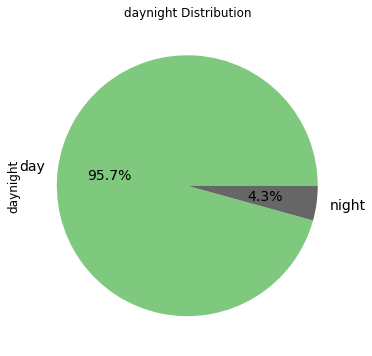

In [221]:
#Churn Distribution
pie_chart = tel_fire['daynight'].value_counts()*100.0 /len(tel_fire)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['day', 'night'],figsize =(8,6), fontsize = 14,cmap='Accent' )  
ax.set_ylabel('daynight',fontsize = 12)
ax.set_title('daynight Distribution', fontsize = 12)
plt.show()


<AxesSubplot:ylabel='Frequency'>

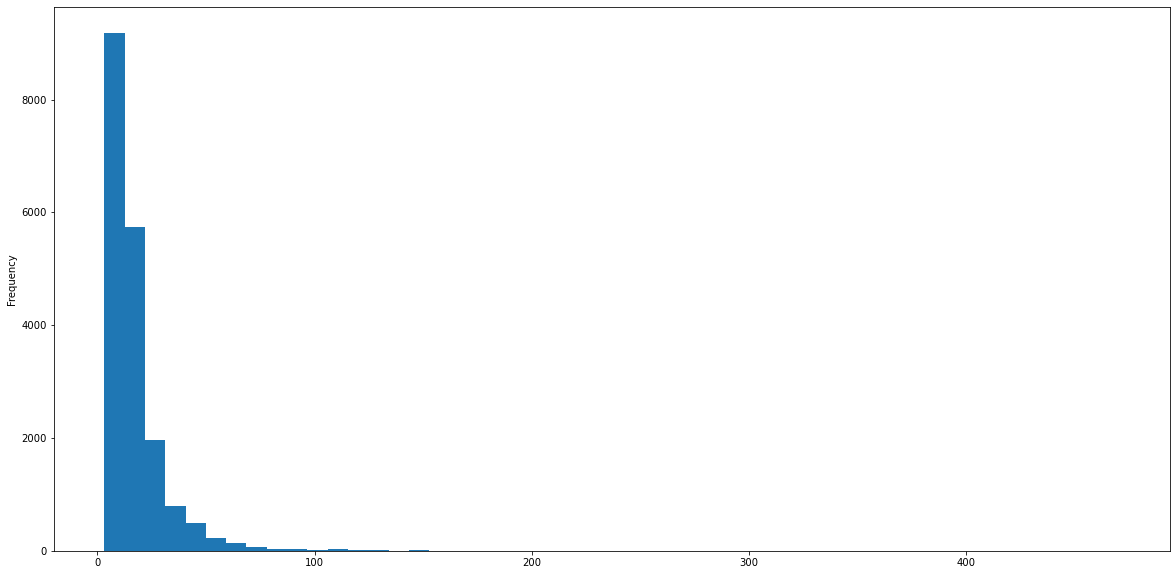

In [222]:
tel_fire['frp'].plot(kind='hist', figsize = (20,10), bins =50)

In [223]:
def convert_Point(facebook_relative_wealth):
    return Point(facebook_relative_wealth['longitude'],facebook_relative_wealth['latitude'])

tel_fire['geometry'] = tel_fire[['latitude','longitude']].apply(convert_Point,axis=1)
tel_fire = gpd.GeoDataFrame(tel_fire)

In [224]:
tel_fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry
0,18.3777,80.5314,318.6,1.0,1.0,2015-01-02,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0,POINT (80.53140 18.37770)
1,17.5898,80.9893,315.4,1.2,1.1,2015-01-04,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0,POINT (80.98930 17.58980)
2,17.6028,81.1612,311.8,1.2,1.1,2015-01-05,527,Terra,MODIS,46,6.03,299.8,6.0,D,0,POINT (81.16120 17.60280)
3,17.5241,80.3135,317.0,1.1,1.0,2015-01-05,527,Terra,MODIS,69,6.03,302.0,9.3,D,0,POINT (80.31350 17.52410)
4,17.7571,80.3404,317.2,2.5,1.5,2015-01-05,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0,POINT (80.34040 17.75710)


In [225]:
tel_fire['acq_date']  = pd.to_datetime(tel_fire['acq_date'])
# add a column for Year
tel_fire['Year'] = tel_fire['acq_date'].dt.year
# print the dataframe
tel_fire

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry,Year
0,18.3777,80.5314,318.6,1.0,1.0,2015-01-02,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0,POINT (80.53140 18.37770),2015
1,17.5898,80.9893,315.4,1.2,1.1,2015-01-04,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0,POINT (80.98930 17.58980),2015
2,17.6028,81.1612,311.8,1.2,1.1,2015-01-05,527,Terra,MODIS,46,6.03,299.8,6.0,D,0,POINT (81.16120 17.60280),2015
3,17.5241,80.3135,317.0,1.1,1.0,2015-01-05,527,Terra,MODIS,69,6.03,302.0,9.3,D,0,POINT (80.31350 17.52410),2015
4,17.7571,80.3404,317.2,2.5,1.5,2015-01-05,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0,POINT (80.34040 17.75710),2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18780,18.3923,77.8257,315.4,1.0,1.0,2021-08-24,529,Terra,MODIS,61,6.03,298.3,7.2,D,0,POINT (77.82570 18.39230),2021
18781,18.4943,77.7611,317.2,1.0,1.0,2021-08-24,529,Terra,MODIS,37,6.03,298.6,8.2,D,0,POINT (77.76110 18.49430),2021
18782,18.4805,79.3012,314.0,1.9,1.3,2021-08-25,744,Aqua,MODIS,33,6.03,292.8,15.3,D,0,POINT (79.30120 18.48050),2021
18783,17.9506,80.7815,316.8,2.1,1.4,2021-08-26,826,Aqua,MODIS,48,6.03,289.9,18.6,D,2,POINT (80.78150 17.95060),2021


# TASK - 1
- ### In this task, we want you to provide a JSON output which summarised the number of fires per administrative boundary per year in Telangana. The json output should include the following keys - adm_name, year, fireCount. Please use the same key names, and the boundary names as available from GADM Level 3

- Expected Deliverable - Code (TASK1.ipynb) + JSON File Output (output1.json)

<img width="3470" alt="image" src="gadm_2.png">

In [226]:
boundaries=pd.read_csv("gadm40_IND_3.csv") #ALL BOUNDARY NAMES ARE AVAILABLES 

In [227]:
boundaries.head()

,ID_0,COUNTRY,NAME_1,NL_NAME_1,NAME_2,NL_NAME_2,ID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,name,description,WKT
0,Andaman and Nicobar,NaN,Nicobar Islands,NaN,IND.1.1.1_1,n.a. ( 2304),NaN,NaN,Taluk,Taluk,NaN,NaN,NaN,NaN,IND,India,MULTIPOLYGON (((93.7898790000001 6.85201300100...
1,Andaman and Nicobar,NaN,North and Middle Andaman,NaN,IND.1.2.1_1,n.a. ( 2178),NaN,NaN,Taluk,Taluk,NaN,NaN,NaN,NaN,IND,India,MULTIPOLYGON (((92.8444060000001 12.1496910000...
2,Andaman and Nicobar,NaN,South Andaman,NaN,IND.1.3.1_1,n.a. ( 2178),NaN,NaN,Taluk,Taluk,NaN,NaN,NaN,NaN,IND,India,MULTIPOLYGON (((92.5211109990001 10.8969430010...
3,Andhra Pradesh,NaN,Anantapur,NaN,IND.2.1.1_1,Anantapur,NaN,NaN,Taluk,Taluk,NaN,NaN,NaN,NaN,IND,India,"MULTIPOLYGON (((77.8446884150001 14.585761071,..."
4,Andhra Pradesh,NaN,Anantapur,NaN,IND.2.1.2_1,Dharmavaram,NaN,NaN,Taluk,Taluk,NaN,NaN,NaN,NaN,IND,India,"MULTIPOLYGON (((77.354522706 14.5215511320001,..."


In [228]:
boundaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_0         2336 non-null   object 
 1   COUNTRY      0 non-null      float64
 2   NAME_1       2336 non-null   object 
 3   NL_NAME_1    0 non-null      float64
 4   NAME_2       2336 non-null   object 
 5   NL_NAME_2    2336 non-null   object 
 6   ID_3         188 non-null    object 
 7   NAME_3       0 non-null      float64
 8   VARNAME_3    2336 non-null   object 
 9   NL_NAME_3    2336 non-null   object 
 10  TYPE_3       0 non-null      float64
 11  ENGTYPE_3    0 non-null      float64
 12  CC_3         0 non-null      float64
 13  HASC_3       0 non-null      float64
 14  name         2336 non-null   object 
 15  description  2336 non-null   object 
 16  WKT          2336 non-null   object 
dtypes: float64(7), object(10)
memory usage: 310.4+ KB


In [229]:
boundaries["NAME_1"].nunique()

659

In [230]:
boundaries.isnull().mean()*100 # Null entries are there in dataset.

ID_0             0.000000
COUNTRY        100.000000
NAME_1           0.000000
NL_NAME_1      100.000000
NAME_2           0.000000
NL_NAME_2        0.000000
ID_3            91.952055
NAME_3         100.000000
VARNAME_3        0.000000
NL_NAME_3        0.000000
TYPE_3         100.000000
ENGTYPE_3      100.000000
CC_3           100.000000
HASC_3         100.000000
name             0.000000
description      0.000000
WKT              0.000000
dtype: float64

In [231]:
# In boudaries entries country,COUNTRY,NL_NAME_1,NAME_3,TYPE_3,ENGTYPE_3, CC_3 , HASC_3  these columns are 100% empty values we drop the column.
boundaries.drop(['COUNTRY','NL_NAME_1','NAME_3','TYPE_3','ENGTYPE_3','CC_3','HASC_3'],1,inplace=True)

In [232]:
boundaries.drop(['ID_3'],1,inplace=True)

In [233]:
boundaries.columns

Index(['ID_0', 'NAME_1', 'NAME_2', 'NL_NAME_2', 'VARNAME_3', 'NL_NAME_3',
       'name', 'description', 'WKT'],
      dtype='object')

In [234]:
boundaries.isnull().mean()*100 # No Null entries are there in dataset.

ID_0           0.0
NAME_1         0.0
NAME_2         0.0
NL_NAME_2      0.0
VARNAME_3      0.0
NL_NAME_3      0.0
name           0.0
description    0.0
WKT            0.0
dtype: float64

In [235]:
boundaries.head()

,ID_0,NAME_1,NAME_2,NL_NAME_2,VARNAME_3,NL_NAME_3,name,description,WKT
0,Andaman and Nicobar,Nicobar Islands,IND.1.1.1_1,n.a. ( 2304),Taluk,Taluk,IND,India,MULTIPOLYGON (((93.7898790000001 6.85201300100...
1,Andaman and Nicobar,North and Middle Andaman,IND.1.2.1_1,n.a. ( 2178),Taluk,Taluk,IND,India,MULTIPOLYGON (((92.8444060000001 12.1496910000...
2,Andaman and Nicobar,South Andaman,IND.1.3.1_1,n.a. ( 2178),Taluk,Taluk,IND,India,MULTIPOLYGON (((92.5211109990001 10.8969430010...
3,Andhra Pradesh,Anantapur,IND.2.1.1_1,Anantapur,Taluk,Taluk,IND,India,"MULTIPOLYGON (((77.8446884150001 14.585761071,..."
4,Andhra Pradesh,Anantapur,IND.2.1.2_1,Dharmavaram,Taluk,Taluk,IND,India,"MULTIPOLYGON (((77.354522706 14.5215511320001,..."


In [236]:
boundaries['NAME_1'].value_counts()

Raigarh            23
Nellore            18
Jamnagar           15
Yavatmal           14
Surat              14
                   ..
Udhampur            1
Srinagar            1
Shupiyan            1
Samba               1
Nicobar Islands     1
Name: NAME_1, Length: 659, dtype: int64

In [237]:
boundaries['name'].value_counts()

IND    2336
Name: name, dtype: int64

In [238]:
boundaries['description'].value_counts()

India    2336
Name: description, dtype: int64

In [239]:
boundaries['NL_NAME_3'].value_counts()

Taluk    2336
Name: NL_NAME_3, dtype: int64

In [240]:
boundaries['VARNAME_3'].value_counts()

Taluk    2336
Name: VARNAME_3, dtype: int64

In [241]:
# Drop the most redundant columns
boundaries.drop(['name','description','VARNAME_3','NL_NAME_3'],1,inplace=True)

In [242]:
boundaries.shape

(2336, 5)

In [243]:
boundaries['ID_0'].value_counts()# NAMES OF THE STATES

Maharashtra               305
Rajasthan                 215
Uttar Pradesh             214
Gujarat                   213
Karnataka                 176
Madhya Pradesh            166
Tamil Nadu                161
Andhra Pradesh            131
Telangana                  72
Himachal Pradesh           66
Chhattisgarh               62
Kerala                     62
Odisha                     58
West Bengal                53
Bihar                      53
Punjab                     47
Haryana                    45
Uttarakhand                32
Assam                      31
Manipur                    28
Jharkhand                  28
Jammu and Kashmir          24
Arunachal Pradesh          18
Goa                        12
Meghalaya                  11
Nagaland                   11
Tripura                    11
Mizoram                    10
Lakshadweep                 5
Puducherry                  4
Sikkim                      4
Andaman and Nicobar         3
Daman and Diu               2
Chandigarh

In [244]:
boundaries['NAME_1'].value_counts()

Raigarh            23
Nellore            18
Jamnagar           15
Yavatmal           14
Surat              14
                   ..
Udhampur            1
Srinagar            1
Shupiyan            1
Samba               1
Nicobar Islands     1
Name: NAME_1, Length: 659, dtype: int64

In [245]:
boundaries['NAME_2'].value_counts()# no redundant data

IND.1.1.1_1      1
IND.28.20.3_1    1
IND.28.12.4_1    1
IND.28.13.1_1    1
IND.28.14.1_1    1
                ..
IND.16.16.4_1    1
IND.16.16.5_1    1
IND.16.16.6_1    1
IND.16.16.7_1    1
IND.36.20.2_1    1
Name: NAME_2, Length: 2336, dtype: int64

In [246]:
boundaries['NL_NAME_2'].value_counts()

Rajgarh         4
Patan           3
Fatehpur        3
Williamnagar    3
Gangapur        3
               ..
Srinivaspur     1
Mulbagal        1
Malur           1
Kolar           1
Raiganj         1
Name: NL_NAME_2, Length: 2223, dtype: int64

In [247]:
boundaries.columns

Index(['ID_0', 'NAME_1', 'NAME_2', 'NL_NAME_2', 'WKT'], dtype='object')

In [248]:
boundaries

,ID_0,NAME_1,NAME_2,NL_NAME_2,WKT
0,Andaman and Nicobar,Nicobar Islands,IND.1.1.1_1,n.a. ( 2304),MULTIPOLYGON (((93.7898790000001 6.85201300100...
1,Andaman and Nicobar,North and Middle Andaman,IND.1.2.1_1,n.a. ( 2178),MULTIPOLYGON (((92.8444060000001 12.1496910000...
2,Andaman and Nicobar,South Andaman,IND.1.3.1_1,n.a. ( 2178),MULTIPOLYGON (((92.5211109990001 10.8969430010...
3,Andhra Pradesh,Anantapur,IND.2.1.1_1,Anantapur,"MULTIPOLYGON (((77.8446884150001 14.585761071,..."
4,Andhra Pradesh,Anantapur,IND.2.1.2_1,Dharmavaram,"MULTIPOLYGON (((77.354522706 14.5215511320001,..."
...,...,...,...,...,...
2331,West Bengal,South 24 Parganas,IND.36.19.1_1,Diamond Harbour,MULTIPOLYGON (((88.0205540010001 21.5722220000...
2332,West Bengal,South 24 Parganas,IND.36.19.2_1,n.a. ( 1187),"MULTIPOLYGON (((88.733391 22.0436, 88.73342100..."
2333,West Bengal,South 24 Parganas,IND.36.19.3_1,n.a. ( 1229),"MULTIPOLYGON (((88.4997329990001 21.597499999,..."
2334,West Bengal,Uttar Dinajpur,IND.36.20.1_1,Islampur,"MULTIPOLYGON (((88.3591995240001 26.242595672,..."


In [249]:
india_administrative_boundaries=boundaries.loc[boundaries['ID_0'] == 'Telangana']

In [250]:
# NEW_FRAME DEFINE THE TELANGANA DETAILS ONLY.
india_administrative_boundaries

,ID_0,NAME_1,NAME_2,NL_NAME_2,WKT
1954,Telangana,Adilabad,IND.32.1.1_1,Adilabad,MULTIPOLYGON (((78.8443374620001 19.7590007780...
1955,Telangana,Adilabad,IND.32.1.2_1,Asifabad,MULTIPOLYGON (((78.9647064200001 19.5702800750...
1956,Telangana,Adilabad,IND.32.1.3_1,Boath,"MULTIPOLYGON (((78.1971511830002 19.331729889,..."
1957,Telangana,Adilabad,IND.32.1.4_1,Chinnur,MULTIPOLYGON (((79.9223098750001 19.1571292870...
1958,Telangana,Adilabad,IND.32.1.5_1,Khanapur,MULTIPOLYGON (((78.5198822010001 19.2216396330...
...,...,...,...,...,...
2021,Telangana,Warangal,IND.32.10.2_1,Jangaon,"MULTIPOLYGON (((79.0897521970002 18.020900727,..."
2022,Telangana,Warangal,IND.32.10.3_1,Mulug,MULTIPOLYGON (((80.3366775520001 18.5905208590...
2023,Telangana,Warangal,IND.32.10.4_1,n.a. ( 1711),MULTIPOLYGON (((80.1527023310002 17.3876209260...
2024,Telangana,Warangal,IND.32.10.5_1,Narsampet,MULTIPOLYGON (((80.3010177610001 17.9669609070...


In [251]:
india_administrative_boundaries.rename(columns={'WKT': 'geometry'}, inplace=True)

In [252]:
india_administrative_boundaries

,ID_0,NAME_1,NAME_2,NL_NAME_2,geometry
1954,Telangana,Adilabad,IND.32.1.1_1,Adilabad,MULTIPOLYGON (((78.8443374620001 19.7590007780...
1955,Telangana,Adilabad,IND.32.1.2_1,Asifabad,MULTIPOLYGON (((78.9647064200001 19.5702800750...
1956,Telangana,Adilabad,IND.32.1.3_1,Boath,"MULTIPOLYGON (((78.1971511830002 19.331729889,..."
1957,Telangana,Adilabad,IND.32.1.4_1,Chinnur,MULTIPOLYGON (((79.9223098750001 19.1571292870...
1958,Telangana,Adilabad,IND.32.1.5_1,Khanapur,MULTIPOLYGON (((78.5198822010001 19.2216396330...
...,...,...,...,...,...
2021,Telangana,Warangal,IND.32.10.2_1,Jangaon,"MULTIPOLYGON (((79.0897521970002 18.020900727,..."
2022,Telangana,Warangal,IND.32.10.3_1,Mulug,MULTIPOLYGON (((80.3366775520001 18.5905208590...
2023,Telangana,Warangal,IND.32.10.4_1,n.a. ( 1711),MULTIPOLYGON (((80.1527023310002 17.3876209260...
2024,Telangana,Warangal,IND.32.10.5_1,Narsampet,MULTIPOLYGON (((80.3010177610001 17.9669609070...


In [253]:
india_worldpop_raster_2020 = rasterio.open('ind_ppp_2020_1km_Aggregated_UNadj.tif')
print('No. of bands:',(india_worldpop_raster_2020.count))
# Reading the first band, filtering negative raster values and visualise data with matplotlib
india_worldpop_raster_2020_tot = india_worldpop_raster_2020.read(1)
india_worldpop_raster_2020_tot[india_worldpop_raster_2020_tot<0] = None

india_worldpop_raster_2020_nonzero = india_worldpop_raster_2020_tot[india_worldpop_raster_2020_tot>0]
population_worldpop = india_worldpop_raster_2020_nonzero[india_worldpop_raster_2020_nonzero > 0].sum()
print('Total population - India (2020): ',round(population_worldpop/1000000000,2),'billion')

No. of bands: 1
Total population - India (2020):  1.38 billion


In [254]:
india_worldpop_raster_2020

<open DatasetReader name='ind_ppp_2020_1km_Aggregated_UNadj.tif' mode='r'>

In [255]:
def get_population_count(vector_polygon,raster_layer):
    gtraster, bound = rasterio.mask.mask(raster_layer, [vector_polygon], crop=True)
    pop_estimate = gtraster[0][gtraster[0]>0].sum()
    return (pop_estimate.round(2))

In [256]:
%%time
india_administrative_boundaries['count_boundaries'] = india_administrative_boundaries['geometry'].apply(get_population_count,raster_layer=india_worldpop_raster_2020)


AttributeError: 'str' object has no attribute 'get'

In [257]:
adm_name = india_administrative_boundaries[['NAME_1','NAME_2','NL_NAME_2','geometry']]

In [258]:
adm_name

,NAME_1,NAME_2,NL_NAME_2,geometry
1954,Adilabad,IND.32.1.1_1,Adilabad,MULTIPOLYGON (((78.8443374620001 19.7590007780...
1955,Adilabad,IND.32.1.2_1,Asifabad,MULTIPOLYGON (((78.9647064200001 19.5702800750...
1956,Adilabad,IND.32.1.3_1,Boath,"MULTIPOLYGON (((78.1971511830002 19.331729889,..."
1957,Adilabad,IND.32.1.4_1,Chinnur,MULTIPOLYGON (((79.9223098750001 19.1571292870...
1958,Adilabad,IND.32.1.5_1,Khanapur,MULTIPOLYGON (((78.5198822010001 19.2216396330...
...,...,...,...,...
2021,Warangal,IND.32.10.2_1,Jangaon,"MULTIPOLYGON (((79.0897521970002 18.020900727,..."
2022,Warangal,IND.32.10.3_1,Mulug,MULTIPOLYGON (((80.3366775520001 18.5905208590...
2023,Warangal,IND.32.10.4_1,n.a. ( 1711),MULTIPOLYGON (((80.1527023310002 17.3876209260...
2024,Warangal,IND.32.10.5_1,Narsampet,MULTIPOLYGON (((80.3010177610001 17.9669609070...


In [259]:
def convert_Point(facebook_relative_wealth):
    return Point(facebook_relative_wealth['longitude'],facebook_relative_wealth['latitude'])

adm_name['geometry'] = tel_fire[['latitude','longitude']].apply(convert_Point,axis=1)
adm_name = gpd.GeoDataFrame(adm_name)
    

In [260]:
adm_name

,NAME_1,NAME_2,NL_NAME_2,geometry
1954,Adilabad,IND.32.1.1_1,Adilabad,POINT (78.15060 18.65530)
1955,Adilabad,IND.32.1.2_1,Asifabad,POINT (78.35560 18.05970)
1956,Adilabad,IND.32.1.3_1,Boath,POINT (78.81940 18.97390)
1957,Adilabad,IND.32.1.4_1,Chinnur,POINT (78.77800 19.05100)
1958,Adilabad,IND.32.1.5_1,Khanapur,POINT (78.47200 19.26640)
...,...,...,...,...
2021,Warangal,IND.32.10.2_1,Jangaon,POINT (78.58260 19.20390)
2022,Warangal,IND.32.10.3_1,Mulug,POINT (78.70950 18.90210)
2023,Warangal,IND.32.10.4_1,n.a. ( 1711),POINT (78.10820 18.49730)
2024,Warangal,IND.32.10.5_1,Narsampet,POINT (78.19830 18.72650)


In [261]:
df_combined = pd.merge(tel_fire,adm_name,on=['geometry'])

In [262]:
df_combined

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry,Year,NAME_1,NAME_2,NL_NAME_2
0,18.6553,78.1506,317.4,1.1,1.1,2015-12-25,820,Aqua,MODIS,55,6.03,306.4,7.6,D,0,POINT (78.15060 18.65530),2015,Adilabad,IND.32.1.1_1,Adilabad
1,18.0597,78.3556,324.7,1.1,1.1,2015-12-25,820,Aqua,MODIS,74,6.03,304.7,16.4,D,0,POINT (78.35560 18.05970),2015,Adilabad,IND.32.1.2_1,Asifabad
2,18.9739,78.8194,324.3,1.2,1.1,2015-12-25,821,Aqua,MODIS,75,6.03,305.9,18.6,D,0,POINT (78.81940 18.97390),2015,Adilabad,IND.32.1.3_1,Boath
3,19.0510,78.7780,318.2,1.2,1.1,2015-12-25,821,Aqua,MODIS,66,6.03,303.5,9.8,D,0,POINT (78.77800 19.05100),2015,Adilabad,IND.32.1.4_1,Chinnur
4,19.2664,78.4720,313.4,1.2,1.1,2015-12-25,821,Aqua,MODIS,50,6.03,303.1,6.4,D,0,POINT (78.47200 19.26640),2015,Adilabad,IND.32.1.5_1,Khanapur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,19.2039,78.5826,309.5,1.5,1.2,2015-12-28,545,Terra,MODIS,30,6.03,296.4,6.2,D,0,POINT (78.58260 19.20390),2015,Warangal,IND.32.10.2_1,Jangaon
68,18.9021,78.7095,318.4,1.6,1.2,2015-12-28,545,Terra,MODIS,68,6.03,303.9,14.7,D,0,POINT (78.70950 18.90210),2015,Warangal,IND.32.10.3_1,Mulug
69,18.4973,78.1082,318.9,1.5,1.2,2015-12-28,545,Terra,MODIS,64,6.03,305.6,13.1,D,0,POINT (78.10820 18.49730),2015,Warangal,IND.32.10.4_1,n.a. ( 1711)
70,18.7265,78.1983,318.0,1.5,1.2,2015-12-28,545,Terra,MODIS,63,6.03,304.1,13.2,D,0,POINT (78.19830 18.72650),2015,Warangal,IND.32.10.5_1,Narsampet


In [263]:
df_combined.rename(columns={'frp': 'fireCOUNT'}, inplace=True)

In [264]:
tel_boundaries_fire = df_combined[['NAME_1','NAME_2','NL_NAME_2','Year','fireCOUNT']]

In [265]:
tel_boundaries_fire

,NAME_1,NAME_2,NL_NAME_2,Year,fireCOUNT
0,Adilabad,IND.32.1.1_1,Adilabad,2015,7.6
1,Adilabad,IND.32.1.2_1,Asifabad,2015,16.4
2,Adilabad,IND.32.1.3_1,Boath,2015,18.6
3,Adilabad,IND.32.1.4_1,Chinnur,2015,9.8
4,Adilabad,IND.32.1.5_1,Khanapur,2015,6.4
...,...,...,...,...,...
67,Warangal,IND.32.10.2_1,Jangaon,2015,6.2
68,Warangal,IND.32.10.3_1,Mulug,2015,14.7
69,Warangal,IND.32.10.4_1,n.a. ( 1711),2015,13.1
70,Warangal,IND.32.10.5_1,Narsampet,2015,13.2


- ### TASK - 2
NASA Fire Information dataset includes categories of fires that are not a result of agricultural practices as well. But for our analysis, we want to create a subset of this which gives the probability of a fire being caused by agricultural practices. The task for you is to use the ESRI LULC Map to propose a methodology and implementation for creating this subset. As this is an unsupervised model, we will not specificially be testing your code for evaluation metrics but on your approach and implementation. The coding needs to be in PYTHON ONLY.

The output of this task should be in a JSON format and should include the following keys - fireID, probability

Along with this implementation, we want you to create a short medium blog post (maximum 600 words - include plots/any other visualizations if you have them) on your analysis, methodology, results, and conclusions from this exercise. If you are new to Medium, please use this resource to know how to write your first blog post

Expected Deliverable - Code (TASK2.ipynb) + JSON File Output (output2.json) + Medium Blog Draft/Published Link

check out this link for detailed information on How to Contribute to a GitHub Project

In [266]:
df = gpd.read_file('telangana_shapefile.geojson')

In [267]:
df

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IND,India,IND.32_1,Telangana,None,None,State,State,None,IN.TG,"MULTIPOLYGON (((79.21147 16.36281, 79.22324 16..."


In [268]:
df.shape

(1, 11)

In [269]:
df.drop(['GID_0','NAME_0','NL_NAME_1','VARNAME_1','TYPE_1','ENGTYPE_1','CC_1','HASC_1'],1,inplace=True)

In [270]:
df

,GID_1,NAME_1,geometry
0,IND.32_1,Telangana,"MULTIPOLYGON (((79.21147 16.36281, 79.22324 16..."


In [271]:
def convert_Point(facebook_relative_wealth):
    return Point(facebook_relative_wealth['longitude'],facebook_relative_wealth['latitude'])

df['geometry'] = tel_fire[['latitude','longitude']].apply(convert_Point,axis=1)
df = gpd.GeoDataFrame(df)
    

In [272]:
df # It shows the grid boundary of telangna.

,GID_1,NAME_1,geometry
0,IND.32_1,Telangana,POINT (80.53140 18.37770)


# define a shape file of telangna here for further details we use tel_boundaries_fire
- ### GID AS WE TAKE FIRE _ID , PROBABILTY WE CALCULATE ON BASIS FIRECOUNT.

In [273]:
tel_boundaries_fire_1 = tel_boundaries_fire[['NAME_2','fireCOUNT']]

In [274]:
tel_boundaries_fire_1.rename(columns={'NAME_2': 'fireID','fireCOUNT': 'probability'}, inplace=True)

In [277]:
tel_boundaries_fire_1

,fireID,probability
0,IND.32.1.1_1,7.6
1,IND.32.1.2_1,16.4
2,IND.32.1.3_1,18.6
3,IND.32.1.4_1,9.8
4,IND.32.1.5_1,6.4
...,...,...
67,IND.32.10.2_1,6.2
68,IND.32.10.3_1,14.7
69,IND.32.10.4_1,13.1
70,IND.32.10.5_1,13.2


In [279]:
tel_boundaries_fire_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fireID       72 non-null     object 
 1   probability  72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [281]:
tel_boundaries_fire_1 = tel_boundaries_fire_1.groupby('fireID').sum()/df.shape[0]

In [282]:
tel_boundaries_fire_1.head()

,probability
fireID,
IND.32.1.10_1,8.1
IND.32.1.1_1,7.6
IND.32.1.2_1,16.4
IND.32.1.3_1,18.6
IND.32.1.4_1,9.8
